In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### We want to plot alcohol consumption and suicides rates over time for South Korea, Japan and Russia

In [2]:
a = pd.read_csv("../data/alcohol_per_capita2.csv")
a.head()

,year,alcohol per capita,country
0,1961,0.41,REPUBLIC OF KOREA
1,1962,0.41,REPUBLIC OF KOREA
2,1963,0.34,REPUBLIC OF KOREA
3,1964,0.33,REPUBLIC OF KOREA
4,1965,0.50,REPUBLIC OF KOREA


In [3]:
a["country"].value_counts()

UNITED STATES         60
JAPAN                 59
REPUBLIC OF KOREA     59
RUSSIAN FEDERATION    57
Name: country, dtype: int64

In [4]:
a_kjr = a[(a["country"]=="REPUBLIC OF KOREA")|(a["country"]=="JAPAN")|(a["country"]=="RUSSIAN FEDERATION")]
a_kjr.sort_values("year", ascending=False)
a_kjr.head()

,year,alcohol per capita,country
0,1961,0.41,REPUBLIC OF KOREA
1,1962,0.41,REPUBLIC OF KOREA
2,1963,0.34,REPUBLIC OF KOREA
3,1964,0.33,REPUBLIC OF KOREA
4,1965,0.50,REPUBLIC OF KOREA


In [5]:
s = pd.read_csv("../data/master_grouped_ccy.csv")
su = s.drop(columns="Unnamed: 0")

In [6]:
su["country"] = su["country"].str.upper()

In [7]:
su_kjr = su[(su["country"]=="REPUBLIC OF KOREA")|(su["country"]=="JAPAN")|(su["country"]=="RUSSIAN FEDERATION")]

In [8]:
su_kjr.head()

,continent,country,year,suicides_no,population,gdp_per_capita ($),s_rate
1115,Asia,JAPAN,1985,23257,112809200,12401,20.62
1116,Asia,JAPAN,1986,25484,113679000,18288,22.42
1117,Asia,JAPAN,1987,23663,114416000,22137,20.68
1118,Asia,JAPAN,1988,22676,115101000,26687,19.70
1119,Asia,JAPAN,1989,21013,115766000,26389,18.15


In [9]:
su_kjr["country"].value_counts()

JAPAN                 31
REPUBLIC OF KOREA     31
RUSSIAN FEDERATION    27
Name: country, dtype: int64

In [10]:
al_su = su_kjr.merge(a_kjr, how="left", on=["country","year"]).dropna()

In [11]:
al_su.head()

,continent,country,year,suicides_no,population,gdp_per_capita ($),s_rate,alcohol per capita
0,Asia,JAPAN,1985,23257,112809200,12401,20.62,2.94
1,Asia,JAPAN,1986,25484,113679000,18288,22.42,2.93
2,Asia,JAPAN,1987,23663,114416000,22137,20.68,2.81
3,Asia,JAPAN,1988,22676,115101000,26687,19.70,3.05
4,Asia,JAPAN,1989,21013,115766000,26389,18.15,2.63


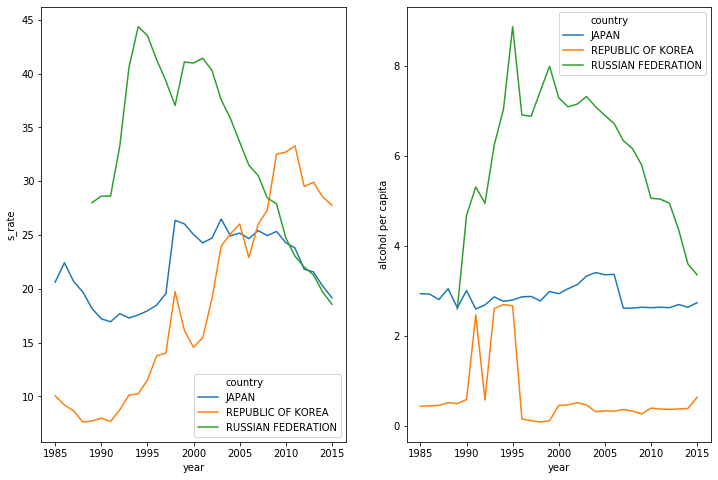

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
sns.lineplot(data=al_su, x=al_su["year"], y=al_su["s_rate"], hue=al_su["country"], ax=axes[0])
sns.lineplot(data=al_su, x=al_su["year"], y=al_su["alcohol per capita"],hue=al_su["country"], ax=axes[1])

### Now we´d like to check whether there is a correlation between alcohol consumption and suicides rates 

In [28]:
al_su_k = al_su[al_su["country"] == "REPUBLIC OF KOREA"]
al_su_j = al_su[al_su["country"] == "JAPAN"]
al_su_r = al_su[al_su["country"] == "RUSSIAN FEDERATION"]

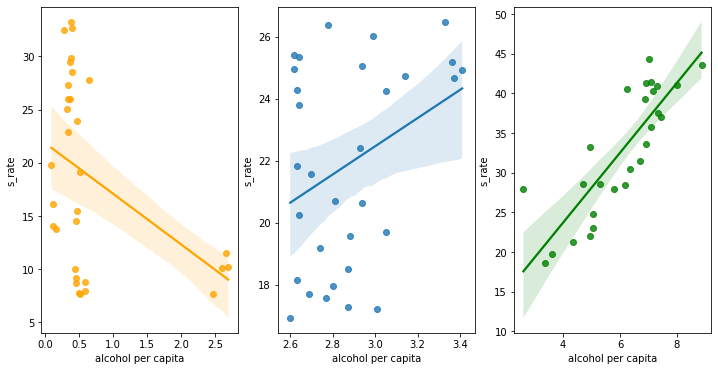

In [38]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

sns.regplot (data=al_su_k, 
             x="alcohol per capita", 
             y="s_rate",
             color="orange",
             ax=axes[0])

sns.regplot (data=al_su_j, 
             x="alcohol per capita", 
             y="s_rate",
             ax=axes[1])

sns.regplot (data=al_su_r, 
             x="alcohol per capita", 
             y="s_rate",
             color="green",
             ax=axes[2])
